<a href="https://colab.research.google.com/github/aprendizajecifuentes/Google_Colab_Ejercisios/blob/main/Cargar_Archivos_desde_PC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# =============================================================================
# CARGAR ARCHIVO DESDE GOOGLE COLAB CON BOTÓN
# =============================================================================
from google.colab import files
import io

print("📁 SUBE TU ARCHIVO DE EXCEL")
print("=" * 60)
print("Haz clic en 'Elegir archivos' y selecciona tu archivo .xlsx o .csv")
print("=" * 60)

# Subir archivo con botón
uploaded = files.upload()

# Leer el archivo subido
df = None
for filename in uploaded.keys():
    print(f'\n✅ Archivo cargado: {filename}')

    # Detectar tipo de archivo y leer
    if filename.endswith('.xlsx') or filename.endswith('.xls'):
        df = pd.read_excel(io.BytesIO(uploaded[filename]))
        print(f"📊 Archivo Excel leído correctamente")
    elif filename.endswith('.csv'):
        df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='utf-8')
        print(f"📊 Archivo CSV leído correctamente")
    else:
        print(f"⚠️ Formato no soportado. Use .xlsx, .xls o .csv")

📁 SUBE TU ARCHIVO DE EXCEL
Haz clic en 'Elegir archivos' y selecciona tu archivo .xlsx o .csv


Saving ventas.xlsx to ventas.xlsx

✅ Archivo cargado: ventas.xlsx
📊 Archivo Excel leído correctamente


DATOS CARGADOS
        Fecha     Vendedor  Región       Producto   Categoría  \
0  2025-01-05    Ana Gómez   Norte    Laptop X100  Tecnología   
1  2025-01-07  Luis Torres     Sur    Celular Z10  Tecnología   
2  2025-01-10  María Pérez  Centro  Impresora Jet     Oficina   
3  2025-02-02  Carlos Ruiz   Norte     Monitor HD  Tecnología   
4  2025-02-14    Ana Gómez   Oeste    Teclado Pro  Accesorios   
5  2025-02-22  Luis Torres     Sur    Mouse Ultra  Accesorios   
6  2025-03-03  María Pérez  Centro  Escritorio XL     Oficina   
7  2025-03-12  Carlos Ruiz   Norte     Silla Ergo     Oficina   
8  2025-03-25    Ana Gómez   Oeste      Tablet A7  Tecnología   
9  2025-04-05  Luis Torres     Sur  Impresora Jet     Oficina   
10 2025-04-12  María Pérez  Centro    Laptop X100  Tecnología   
11 2025-04-20  Carlos Ruiz   Norte    Mouse Ultra  Accesorios   

    Unidades Vendidas  Precio Unitario  Total Venta  
0                   3             1500         4500  
1                   5          

/tmp/ipython-input-3473526194.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Categoría', y='Precio Unitario', palette='Set2')


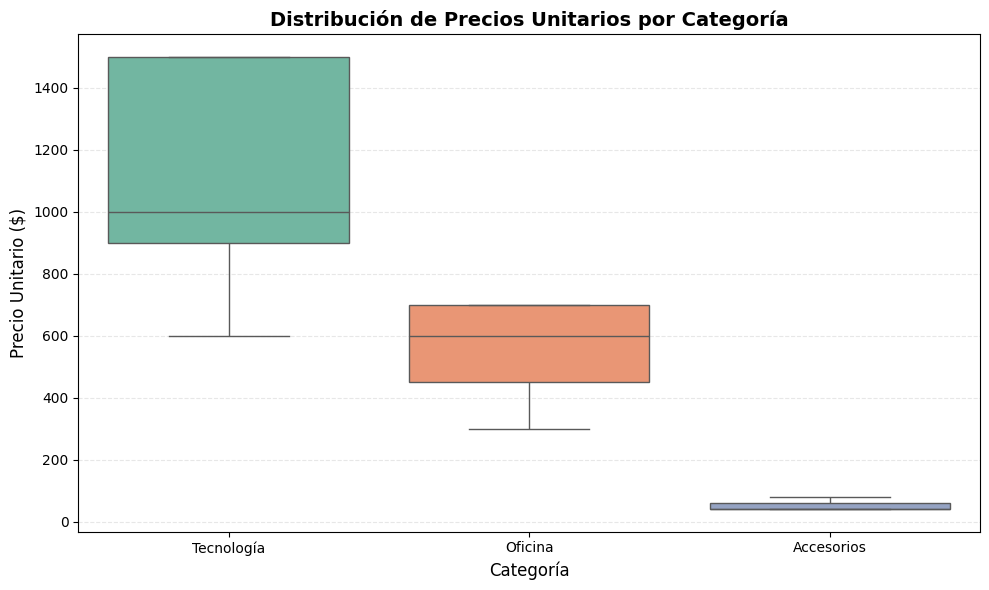


Estadísticas de Precio Unitario por Categoría:
            count         mean         std    min    25%     50%     75%  \
Categoría                                                                  
Accesorios    3.0    53.333333   23.094011   40.0   40.0    40.0    60.0   
Oficina       4.0   550.000000  191.485422  300.0  450.0   600.0   700.0   
Tecnología    5.0  1100.000000  393.700394  600.0  900.0  1000.0  1500.0   

               max  
Categoría           
Accesorios    80.0  
Oficina      700.0  
Tecnología  1500.0  


In [ ]:
# Convertir fecha a formato datetime si la columna existe
if 'Fecha' in df.columns:
    df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y', errors='coerce')

print("=" * 60)
print("DATOS CARGADOS")
print("=" * 60)
print(df)
print("\n")

# =============================================================================
# PARTE 1: BOXPLOT - Distribución de Precios por Categoría
# =============================================================================

print("=" * 60)
print("PARTE 1: BOXPLOT")
print("=" * 60)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Categoría', y='Precio Unitario', palette='Set2')
plt.title('Distribución de Precios Unitarios por Categoría', fontsize=14, fontweight='bold')
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Precio Unitario ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Estadísticas descriptivas por categoría
print("\nEstadísticas de Precio Unitario por Categoría:")
print(df.groupby('Categoría')['Precio Unitario'].describe())


PARTE 2: HEATMAP DE CORRELACIONES

Matriz de Correlación:
                   Unidades Vendidas  Precio Unitario  Total Venta
Unidades Vendidas           1.000000        -0.587197    -0.295425
Precio Unitario            -0.587197         1.000000     0.848589
Total Venta                -0.295425         0.848589     1.000000


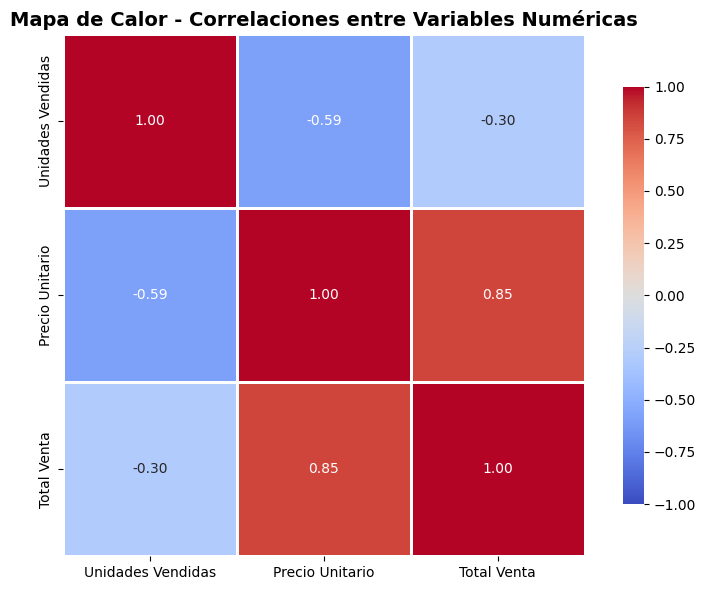

In [ ]:
# =============================================================================
# PARTE 2: HEATMAP - Correlación entre Variables Numéricas
# =============================================================================

print("\n" + "=" * 60)
print("PARTE 2: HEATMAP DE CORRELACIONES")
print("=" * 60)

# Seleccionar solo columnas numéricas
columnas_numericas = ['Unidades Vendidas', 'Precio Unitario', 'Total Venta']
df_numerico = df[columnas_numericas]

# Calcular matriz de correlación
correlacion = df_numerico.corr()

print("\nMatriz de Correlación:")
print(correlacion)

# Crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.2f', vmin=-1, vmax=1)
plt.title('Mapa de Calor - Correlaciones entre Variables Numéricas',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# =============================================================================
# ANÁLISIS ADICIONAL
# =============================================================================

print("\n" + "=" * 60)
print("ANÁLISIS DE RESULTADOS")
print("=" * 60)

print("\n📊 INTERPRETACIÓN DEL BOXPLOT:")
print("- Accesorios: Precios más bajos y menos dispersión")
print("- Oficina: Rango medio de precios con mayor variabilidad")
print("- Tecnología: Precios más altos y mayor dispersión")

print("\n🔥 INTERPRETACIÓN DEL HEATMAP:")
print("- Correlación Total Venta vs Precio Unitario:", f"{correlacion.loc['Total Venta', 'Precio Unitario']:.2f}")
print("- Correlación Total Venta vs Unidades Vendidas:", f"{correlacion.loc['Total Venta', 'Unidades Vendidas']:.2f}")
print("- Correlación Unidades vs Precio:", f"{correlacion.loc['Unidades Vendidas', 'Precio Unitario']:.2f}")

print("\n✅ Visualizaciones generadas exitosamente!")


ANÁLISIS DE RESULTADOS

📊 INTERPRETACIÓN DEL BOXPLOT:
- Accesorios: Precios más bajos y menos dispersión
- Oficina: Rango medio de precios con mayor variabilidad
- Tecnología: Precios más altos y mayor dispersión

🔥 INTERPRETACIÓN DEL HEATMAP:
- Correlación Total Venta vs Precio Unitario: 0.85
- Correlación Total Venta vs Unidades Vendidas: -0.30
- Correlación Unidades vs Precio: -0.59

✅ Visualizaciones generadas exitosamente!
